# TP Regression 1

In [3]:
import numpy as np
import plotly.express as px
from src.utils import plot_regression

The function plot_regression is given to the user to plot the points in a 2d setting and the predicted regression. </br>
The next class is given to the user to generate the desirated dataset. The user need to be given a numpy array with the vector $\theta$. Then, fix a range x_min and x_max. The dataset while be generated randomly in the hypercube in the range $[x_{min} , x_{max}]^d$ with $d+1 = dim(\theta)$.
Then the user can generate either a linear dataset. Also we enable the possibility to generate a polynomial (but only with on variable).

In [11]:
class RegressionDataset:
    def __init__(self, theta, x_min, x_max):
        self.theta = theta
        self.n_dimension = theta.shape[0] - 1
        self.x_min, self.x_max = x_min, x_max

    def linear(self, n, sigma):
        X = np.concatenate(
            (np.ones((n, 1)),
             np.random.uniform(self.x_min, self.x_max, (n, self.n_dimension))),
            axis=1)
        y = X@self.theta + sigma*np.random.randn(n)
        return X, y

    def polymomial(self, n, sigma):
        x0 = np.random.uniform(self.x_min, self.x_max, (n, 1))
        X = np.ones((n, 1))
        for i in range(1, self.n_dimension+1):
            X = np.concatenate((X, x0**i), axis=1)
        y = X@self.theta + sigma*np.random.randn(n)
        return X, y

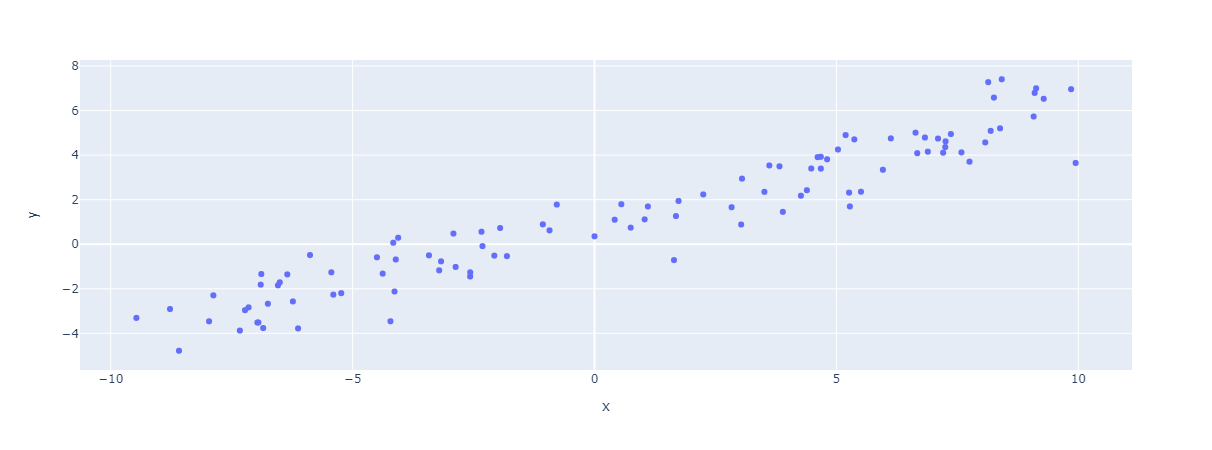

In [15]:
theta = np.array([1, 0.5])
rdata = RegressionDataset(theta, -10, 10)
X, y = rdata.linear(100, 1)
px.scatter(x=X[:,1], y=y)

#### Question:
En supposant que X est de rang plein, implemeter la regression linéaire. <br>
Il faut une fonction fit pour entrainer le modele (qui met a jour theta), predict pour predire et loss pour calculer la perte de l'estimateur trouvé.

In [6]:
class LSRegression:
    def __init__(self):
        self.theta = np.nan

CPU times: user 312 ms, sys: 46.9 ms, total: 359 ms
Wall time: 359 ms


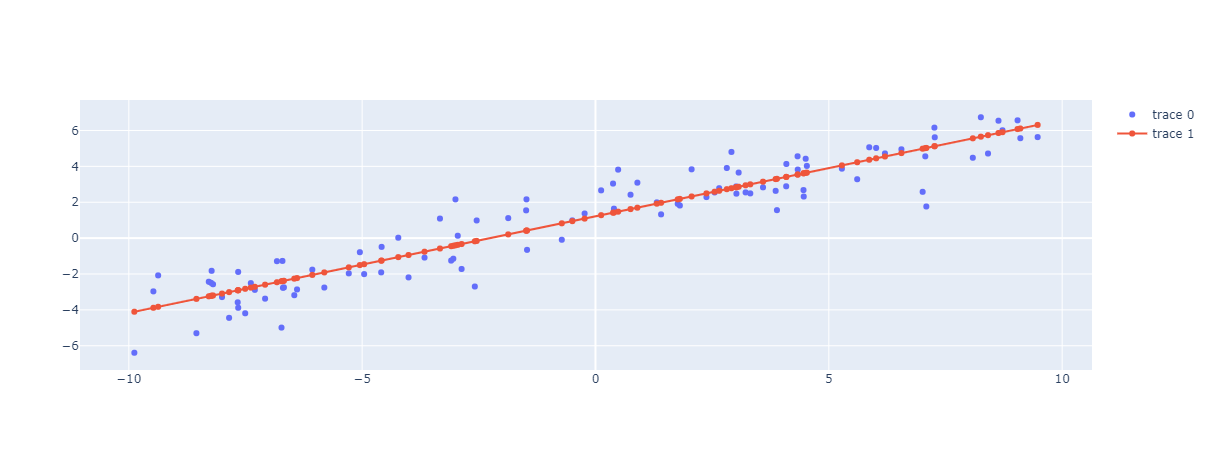

In [7]:
%%time
ls = LSRegression()
ls.fit(X, y)
y_hat = ls.predict(X)
plot_regression(X[:, 1], y, y_hat)

#### Question:
- Implemeter la regression linéaire par descente de gradient. <br>
        Il faut une fonction fit pour entrainer le modele (qui met a jour theta) qui rpendra en argument un certain nombre d'epochs et un parametre lr la learning rate en plus de X et y, predict pour predire et loss pour calculer la perte de l'estimateur trouvé.
- Tester plusieurs hyperparametres pour le nombre d'epochs et le lr. (indice $lr<=1$)

In [8]:
class LSRegression_GD:
    def __init__(self, d):
        self.theta = np.random.randn(d)

#### Questions:
- Comparer les resultats entre la resolution explicite et le gradient. (Comparer le temps vs la perte)
- Que se passe t'il lorsque n devient grand (Temps, perte pour les 2 algos)? Quand d devient grand?
- Comparer les parametres entre la valeurs vraies (Les parametres theta utilisé pour généré les datasets et les parametres trouvées avec les 2 algos
- Générée un dataset polynomial et plotez la regression linéaire qu'observez vous? Dans la pratique on vous donne un dataset et vous pensez que la regression est polynomiale selon une certaine variable, comment procedez vous? Comment pouvez vous élargir ceci à d'autres classes de fonction?